# Regresión Lineal COVID-19 Ecuador
Realizado por: Tatiana Cárdenas Jho

In [73]:
#Problema:
#Generar un modelo de regresión de los casos confirmados de COVID dentro del Ecuador el mismo que permitirá predecir el comportamiento y/o predicción de la pandemia 

#Importación de librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import datetime as dt
from sklearn.linear_model import LinearRegression  
print('Importadas')

Importadas


In [74]:
#Carga de datos

#Variables
#dataset = pd.read_csv('dataset.csv')
#print(dataset.head())

df=pd.read_csv('dataset.csv') 
print(df.shape)
df.sample(5)

(407, 59)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
38,ECU,South America,Ecuador,2020-04-08,4450,703,243.143,242.0,51.0,21.286,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
386,ECU,South America,Ecuador,2021-03-22,312851,253,1479.000,16478.0,27.0,34.000,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
133,ECU,South America,Ecuador,2020-07-12,67870,661,844.571,5047.0,16.0,38.000,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
5,ECU,South America,Ecuador,2020-03-06,13,0,1.857,NaN,NaN,0.000,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
179,ECU,South America,Ecuador,2020-08-27,111219,670,815.857,6471.0,61.0,38.714,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759


In [75]:
df.describe().round(3)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,407.000,407.000,402.000,394.000,394.000,402.000,407.000,407.000,402.000,394.000,...,407.000,407.0,407.000,407.00,407.0,407.0,407.000,407.0,407.00,407.000
mean,137704.005,852.130,849.336,9215.898,43.891,42.604,7804.996,48.298,48.140,522.353,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759
std,100545.657,967.507,468.354,5646.413,196.902,75.717,5698.879,54.838,26.546,320.036,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
min,6.000,-7953.000,-525.000,2.000,0.000,0.000,0.340,-450.772,-29.757,0.113,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759
25%,44440.000,353.000,562.572,4172.750,12.000,21.179,2518.837,20.008,31.886,236.510,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759
50%,126419.000,765.000,869.143,11276.000,27.000,31.143,7165.367,43.360,49.262,639.118,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759
75%,212012.000,1202.000,1123.750,14059.000,43.000,39.964,12016.736,68.128,63.694,796.857,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759
max,346817.000,11536.000,2038.429,17293.000,3852.000,597.000,19657.418,653.855,115.537,980.159,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759


In [76]:
df.keys()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [77]:
#Analizamos el tipo de dato que tiene el dataset en caso de que tengamos que convertir algún valor
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                                int64
new_cases                                  int64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [79]:
# Expresar las fechas en numero de dias desde el 01 Enero del 2020
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

In [80]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ECU,South America,Ecuador,60,6,6,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
1,ECU,South America,Ecuador,61,6,0,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
2,ECU,South America,Ecuador,62,7,1,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
3,ECU,South America,Ecuador,63,10,3,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
4,ECU,South America,Ecuador,64,13,3,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759


In [81]:
#Variables
totaldate = df['date'].values.reshape(-1,1)
totalcases = df['total_cases'].values.reshape(-1,1)

In [82]:
#Entrenamiento
linear_regressor = LinearRegression()
linear_regressor.fit(totaldate, totalcases)
date_predicted = linear_regressor.predict(totaldate)

In [83]:
print('Pentiende:', linear_regressor.coef_)
print('Intersección":',  linear_regressor.intercept_)

Pentiende: [[848.29342989]]
Intersección": [-85397.16714594]


Pruebas:

In [84]:
#PRUEBA 1

m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
#Prediccion de x dias desde la fecha inicial del Dataset 2020-03-01
dias=700
label1 = m*dias-c
print("Numero de casos a los ",dias," de la fecha inicial del dataset, se obtiene una prediccion de : ",label1)

Numero de casos a los  700  de la fecha inicial del dataset, se obtiene una prediccion de :  679202.5680659452


In [85]:
#PRUEBA 2

m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
#Prediccion de x dias desde la fecha inicial del Dataset 2020-03-01
dias=750
label2 = m*dias-c
print("Numero de casos a los ",dias," de la fecha inicial del dataset, se obtiene una prediccion de : ",label2)

Numero de casos a los  750  de la fecha inicial del dataset, se obtiene una prediccion de :  721617.2395602312


In [86]:
#PRUEBA 3

m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
#Prediccion de x dias desde la fecha inicial del Dataset 2020-03-01
dias=800
label3 = m*dias-c
print("Numero de casos a los ",dias," de la fecha inicial del dataset, se obtiene una prediccion de : ",label3)

Numero de casos a los  800  de la fecha inicial del dataset, se obtiene una prediccion de :  764031.9110545174


In [87]:
#PRUEBA 4

m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
#Prediccion de x dias desde la fecha inicial del Dataset 2020-03-01
dias=900
label4 = m*dias-c
print("Numero de casos a los ",dias," de la fecha inicial del dataset, se obtiene una prediccion de : ",label4)

Numero de casos a los  900  de la fecha inicial del dataset, se obtiene una prediccion de :  848861.2540430896


In [88]:
#PRUEBA 5

m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
#Prediccion de x dias desde la fecha inicial del Dataset 2020-03-01
dias=968
label5 = m*dias-c
print("Numero de casos a los ",dias," de la fecha inicial del dataset, se obtiene una prediccion de : ",label5)

Numero de casos a los  968  de la fecha inicial del dataset, se obtiene una prediccion de :  906545.2072753186


Grafica:

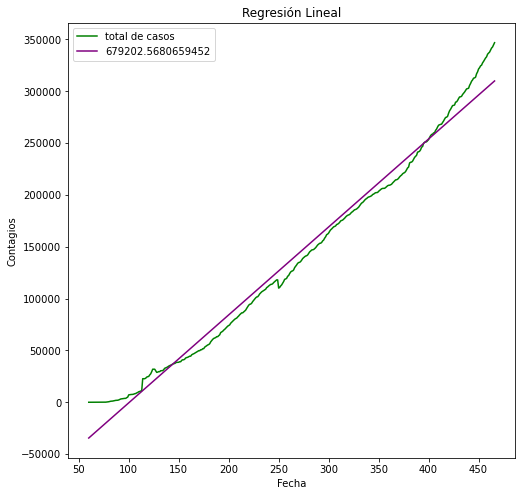

In [96]:
#Grafica 1

fig = plt.figure(figsize=(8,8))
plt.title('Regresión Lineal')
plt.plot(df['date'],df['total_cases'], label='total de casos', color='green',)
plt.plot(totaldate, date_predicted, color='purple', label=label1)
plt.xlabel('Fecha')
plt.ylabel('Contagios')
plt.legend()

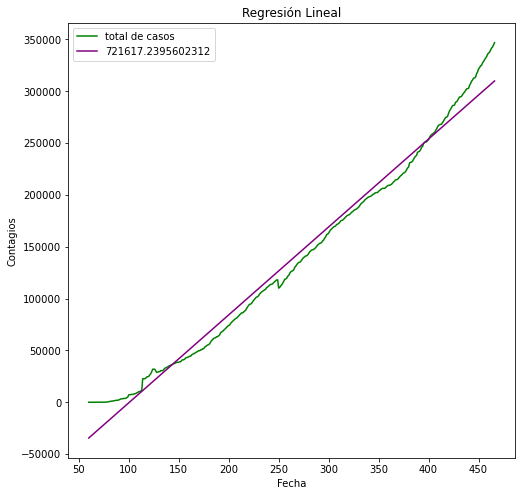

In [97]:
#Grafica 2
fig = plt.figure(figsize=(8,8))
plt.title('Regresión Lineal')
plt.plot(df['date'],df['total_cases'], label='total de casos', color='green',)
plt.plot(totaldate, date_predicted, color='purple', label=label2)
plt.xlabel('Fecha')
plt.ylabel('Contagios')
plt.legend()

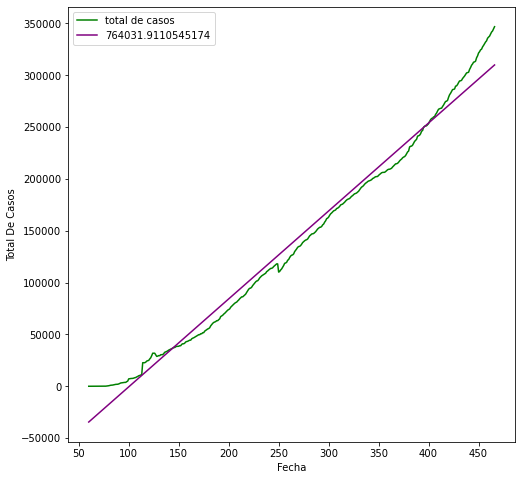

In [91]:
#Grafica 3

fig = plt.figure(figsize=(8,8))
plt.title('Regresión Lineal')
plt.plot(df['date'],df['total_cases'], label='total de casos', color='green',)
plt.plot(totaldate, date_predicted, color='purple', label=label3)
plt.xlabel('Fecha')
plt.ylabel('Contagios')
plt.legend()

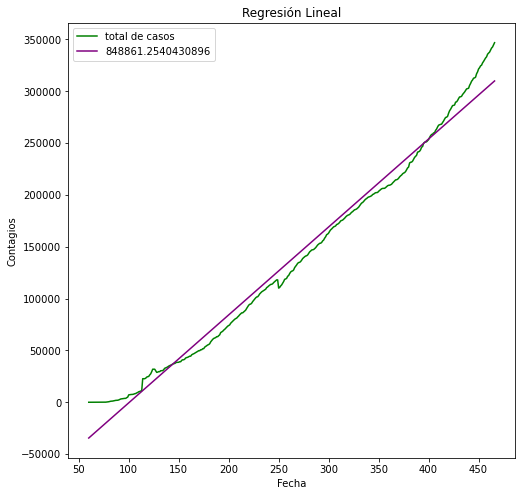

In [98]:
#Grafica 4

fig = plt.figure(figsize=(8,8))
plt.title('Regresión Lineal')
plt.plot(df['date'],df['total_cases'], label='total de casos', color='green',)
plt.plot(totaldate, date_predicted, color='purple', label=label4)
plt.xlabel('Fecha')
plt.ylabel('Contagios')
plt.legend()

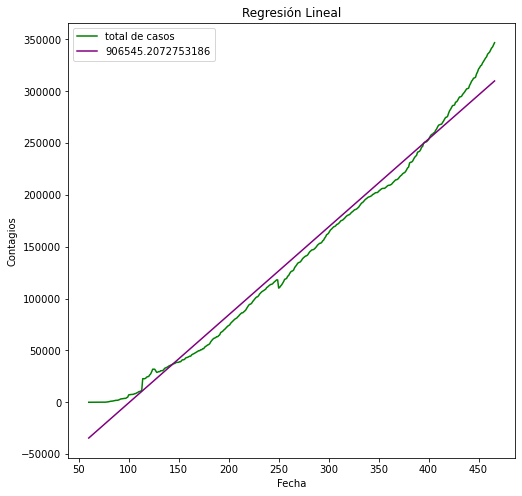

In [99]:
#Grafica 5

fig = plt.figure(figsize=(8,8))
plt.title('Regresión Lineal')
plt.plot(df['date'],df['total_cases'], label='total de casos', color='green',)
plt.plot(totaldate, date_predicted, color='purple', label=label5)
plt.xlabel('Fecha')
plt.ylabel('Contagios')
plt.legend()